In [2]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn-darkgrid")
plt.rcParams["figure.figsize"] = 16, 10

C:\Users\Ela\AppData\Local\Temp/ipykernel_15784/3067028665.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


In [3]:
ggtrends = pd.read_csv("../../ggtrends_downloads/Twitter_Hamburg_historic.csv")
ggtrends = ggtrends.drop(columns=["Unnamed: 0"])

weather = pd.read_csv("../../weather_download/merged_historic_Hamburg.csv")
weather = weather.drop(columns=["Unnamed: 0"])

## Target variable analysis

In [4]:
ggtrends.date = pd.to_datetime(ggtrends.date)

In [5]:
ggtrends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17760 entries, 0 to 17759
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    17760 non-null  datetime64[ns]
 1   value   17760 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 277.6 KB


Text(0.5, 1.0, 'Distribution of Google Trends index for Twitter load in Hamburg')

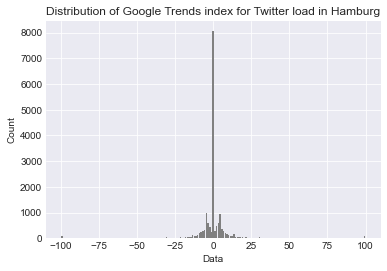

In [6]:
sample_size = ggtrends.shape[0]
x = ggtrends.value

bins = plt.hist(x, bins=sample_size//100, rwidth=.85, facecolor='#808080')
plt.ylabel("Count")
plt.xlabel("Data")
plt.title("Distribution of Google Trends index for Twitter load in Hamburg")

Text(0.5, 1.0, 'Course of the Google Trends index over the week')

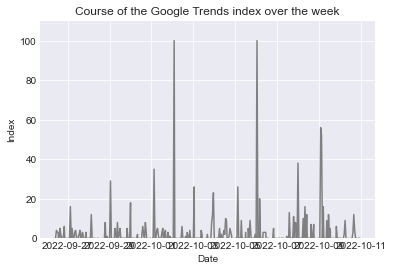

In [7]:
h = 350
y = ggtrends.value[-h:]
x = ggtrends.date[-h:]

plt.plot(x, y, "#808080")
plt.ylim(0, max(y) * 1.1)
plt.ylabel("Index")
plt.xlabel("Date")
plt.title("Course of the Google Trends index over the week")

Text(0.5, 1.0, 'Course of the Google Trends index over the whole available history (2 years)')

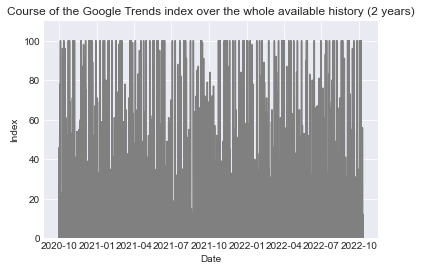

In [8]:
y = ggtrends.value
x = ggtrends.date

plt.plot(x, y, "#808080")
plt.ylim(0, max(y) * 1.1)
plt.ylabel("Index")
plt.xlabel("Date")
plt.title("Course of the Google Trends index over the whole available history (2 years)")

## Independent variables analysis

In [9]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17797 entries, 0 to 17796
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Address              17797 non-null  object 
 1   Date time            17797 non-null  object 
 2   Minimum Temperature  17749 non-null  float64
 3   Maximum Temperature  17749 non-null  float64
 4   Temperature          17749 non-null  float64
 5   Dew Point            17677 non-null  float64
 6   Relative Humidity    17677 non-null  float64
 7   Heat Index           241 non-null    float64
 8   Wind Speed           17652 non-null  float64
 9   Wind Gust            0 non-null      float64
 10  Wind Direction       17652 non-null  float64
 11  Wind Chill           7722 non-null   float64
 12  Precipitation        17797 non-null  float64
 13  Precipitation Cover  0 non-null      float64
 14  Snow Depth           11016 non-null  float64
 15  Visibility           16413 non-null 

In [10]:
# keep columns with >90% non-missing values
cols = weather.columns[weather.isnull().sum()/len(weather) < .90]
weather = weather[cols]
weather = weather.drop(columns=["Address", "Resolved Address", "Name", "Conditions"])

In [11]:
weather["Date time"] = pd.to_datetime(weather["Date time"])
weather = weather.set_index("Date time")

Text(0.5, 0, 'Date')

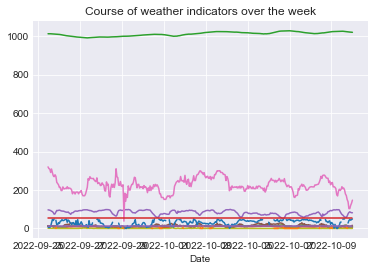

In [12]:
plt.plot(weather[-h:])
plt.title('Course of weather indicators over the week')
plt.xlabel('Date')

Text(0.5, 0, 'Date')

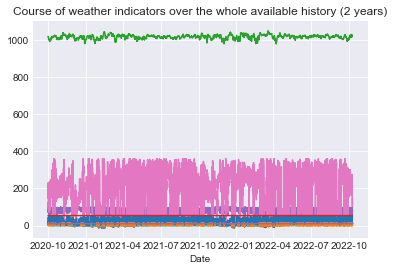

In [13]:
plt.plot(weather)
plt.title('Course of weather indicators over the whole available history (2 years)')
plt.xlabel('Date')

## Merge

In [33]:
ggtrends = pd.read_csv("../../ggtrends_downloads/Twitter_Hamburg_historic.csv")
ggtrends = ggtrends.drop(columns=["Unnamed: 0"])
ggtrends.date = pd.to_datetime(ggtrends.date)
ggtrends = ggtrends.set_index("date")
ggtrends = ggtrends.rename(columns={"value": "y"})

weather = pd.read_csv("../../weather_download/merged_historic_Hamburg.csv")
weather = weather.drop(columns=["Unnamed: 0", "Address", "Resolved Address", "Name", "Conditions", "Latitude", "Longitude"])
cols = weather.columns[weather.isnull().sum()/len(weather) < .90]
weather = weather[cols]
weather["Date time"] = pd.to_datetime(weather["Date time"])
weather = weather.set_index("Date time")

In [34]:
ggtrends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17760 entries, 2020-10-01 00:00:00 to 2022-10-10 23:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       17760 non-null  int64
dtypes: int64(1)
memory usage: 277.5 KB


In [35]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17797 entries, 2020-09-30 00:00:00 to 2022-10-10 00:00:00
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Minimum Temperature  17749 non-null  float64
 1   Maximum Temperature  17749 non-null  float64
 2   Temperature          17749 non-null  float64
 3   Dew Point            17677 non-null  float64
 4   Relative Humidity    17677 non-null  float64
 5   Wind Speed           17652 non-null  float64
 6   Wind Direction       17652 non-null  float64
 7   Wind Chill           7722 non-null   float64
 8   Precipitation        17797 non-null  float64
 9   Snow Depth           11016 non-null  float64
 10  Visibility           16413 non-null  float64
 11  Cloud Cover          3585 non-null   float64
 12  Sea Level Pressure   17628 non-null  float64
dtypes: float64(13)
memory usage: 1.9 MB


In [36]:
df = pd.merge(weather, ggtrends, left_index=True, right_index=True)

In [37]:
# Analysis

In [38]:
from pandas_profiling import ProfileReport

In [39]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

In [40]:
profile.to_file("eda.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\Ela\anaconda3\lib\site-packages\pandas_profiling\model\correlations.py:67: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/pandas-profiling/issues
(include the error message: 'cannot reindex from a duplicate axis')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]